In [1]:
from tables import *
import matplotlib.pyplot as plt
import numpy as np
import Gerador as gg

plt.style.use('seaborn-bright')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['axes.labelsize'] = 19
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['xtick.labelsize'] = 19
plt.rcParams['ytick.labelsize'] = 19
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['figure.figsize'] = (19, 8)
plt.rcParams['lines.linewidth'] = 2


In [6]:
coord, p_z =  gg.cd.galaxia(7.0, 1.0, 1.0, 40000)
vel_mod = gg.vd.velocity_module(coord)
veloc = gg.vd.velocity_vector(coord, vel_mod)

In [14]:
coord

array([[ 9.775168  , -0.9321561 , -0.60273975],
       [-0.9332288 ,  0.72492164, -0.20304604],
       [ 1.9766395 , -2.2872436 , -0.57107913],
       ...,
       [18.527058  ,  2.3613157 , -1.7975484 ],
       [ 9.875421  , -2.6340134 ,  0.31003058],
       [-4.3754387 ,  8.891591  ,  0.26757374]], dtype=float32)

In [ ]:
data = open_file("Data/IC_file.hdf5", "r")

In [ ]:
def plot_hist(name):
    arq1 = open_file(f"output/{name}.hdf5", "r")
    vel2 = arq1.root.PartType2.Velocities[::]
    modulo2 = np.linalg.norm(vel2, axis=1)
    plt.hist(modulo2)

def plot_scat(name, t, titulo):
    arq1 = open_file(f"output/{name}.hdf5", "r")
    vel = arq1.root.PartType2.Velocities[::]
    coord = arq1.root.PartType2.Coordinates[::]
    modulo_vel = np.linalg.norm(vel, axis=1)
    modulo_pos = np.linalg.norm(coord, axis=1)
    plt.hist2d(modulo_vel, modulo_pos, bins = 30, range = ((0,200), (0,25)))
    plt.xlabel(r"$|\vec{V}|$ [Km/s]")
    plt.ylabel("|Coordenadas| [Kpc]")
    plt.text(175,24, f"t = {t:.2f} Gyr", fontsize=15, color= "red")
    plt.title(f"{titulo}")
    plt.colorbar().set_label("N de Partículas")

---------------

In [ ]:
plot_scat("sim_020")

## Massa, N de particulas, Tipos
Escolher atriputos da simulação

In [ ]:
arq = open_file("IC/Esfera_Original.hdf5", "a")

In [ ]:
arq

In [ ]:
dir(arq.root.PartType2.Coordinates)

In [ ]:
arq.root.PartType2.Coordinates.ndim

In [ ]:
arq.root.PartType2.Coordinates.shape = (20,3)

In [ ]:
mass = np.array([0, 0, 0.00023252])
NumPart_ThisFile = np.array([0, 0, 40000], dtype = np.uint32)
NumPart_Total = np.array([0, 0, 40000], dtype = np.uint64)
arq.root.Header._v_attrs.MassTable = mass
arq.root.Header._v_attrs.NumPart_ThisFile = NumPart_ThisFile
arq.root.Header._v_attrs.NumPart_Total = NumPart_Total

In [ ]:
arq.close()

## Tipo de Particulas
Dado um array de comprimento 6, cada componente representa um tipo de particula, sendo elas em ordem 
"Gas", "Halo", "Disk", "Bulge", "Stars", and "Bndry"

In [ ]:
arq = open_file("IC/Esfera_Original.hdf5", "a")


In [ ]:

## arq.create_group("/", 'PartType2', 'Disk') ##Criando Grupo
arq.root.PartType2._f_remove(force=True)

In [ ]:
arq.root.PartType1._f_rename("PartType2")

## Formato 
Escolhendo forma de como as particulas estarão distribuidas e a velocidade

In [10]:
data = open_file("Data/IC_file.hdf5", "a")
data.root

/ (RootGroup) ''
  children := ['Header' (Group), 'PartType2' (Group)]

In [12]:
data.root.PartType2.Coordinates[::] = coord
data.root.PartType2.Velocities[::] = veloc

In [5]:
data.root.PartType2.Coordinates[::]

array([[ 9.775168  , -0.9321561 , -0.60273975],
       [-0.9332288 ,  0.72492164, -0.20304604],
       [ 1.9766395 , -2.2872436 , -0.57107913],
       ...,
       [18.527058  ,  2.3613157 , -1.7975484 ],
       [ 9.875421  , -2.6340134 ,  0.31003058],
       [-4.3754387 ,  8.891591  ,  0.26757374]], dtype=float32)

In [18]:
data.close()

In [ ]:
arq.root.PartType2.ParticleIDs 

In [ ]:
Particulas = np.arange(0,40000,1, dtype=np.uint32)

In [ ]:
Particulas.shape

## Gráficos
Visualizando se a esfera foi construida corretamente

In [2]:
arq = open_file("Data/IC_file.hdf5", "r")
vet = arq.root.PartType2.Coordinates[::]
vet_x = vet[:,[0]].flatten()
vet_y = vet[:,[1]].flatten()
vet_z = vet[:,[2]].flatten()

In [ ]:
%matplotlib qt
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(vet_x, vet_y, vet_z, 'o', s = 0.05 )
ax.set_xlim3d(-40, 40)
ax.set_ylim3d(-40, 40)
ax.set_zlim3d(-40, 40)

(-40.0, 40.0)

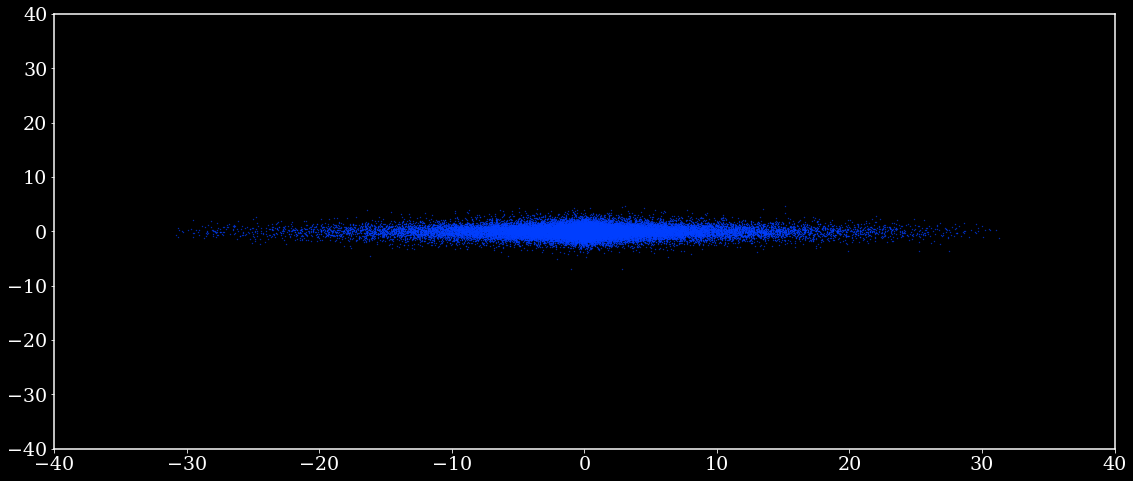

In [3]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(vet_y, vet_z, s= 0.1)
ax.set_xlim(-40, 40)
ax.set_ylim(-40, 40)

In [6]:
arq.close()

In [ ]:
arq = open_file("IC/Esfera_Original.hdf5", "r")

In [ ]:
arq.root.PartType2.Coordinates[::]

In [ ]:
z = arq.root.PartType2.Coordinates[:,[2]].flatten()
 = arq.root.PartType2.Coordinates[:,[2]].flatten()

In [ ]:
z

In [ ]:
## Funcionando

def density_profile(z, p, m, h):
    const = m/(4*np.pi*h**2)
    return const*np.exp(-np.abs(p)/h)*(1/np.cosh(z))**2

def density_ana(data):
    arq = open_file(f"output/{data}.hdf5", "r")
    x, y, z = arq.root.PartType2.Coordinates[:,[0]].flatten(), arq.root.PartType2.Coordinates[:,[1]].flatten(), arq.root.PartType2.Coordinates[:,[2]].flatten()
    r = np.sqrt(x**2 + y**2)
    p = np.sqrt(r**2 - z**2)
    arq.close()
    return p, z
    